In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [371]:
df = pd.read_csv('titanic.csv')

In [372]:
df.shape

(891, 12)

In [373]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [374]:
columns_to_remove = ['PassengerId','Name','Ticket']
df = df.drop(labels=columns_to_remove, axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [375]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:>

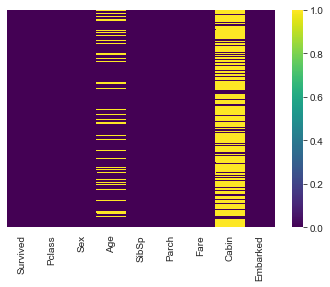

In [376]:
sns.heatmap(df.isnull(),yticklabels=False, cmap='viridis')

<AxesSubplot:xlabel='Survived', ylabel='count'>

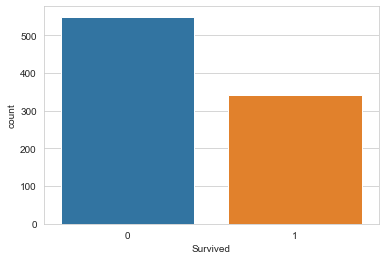

In [377]:
sns.set_style("whitegrid", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.countplot(x='Survived',data=df)

<AxesSubplot:xlabel='Survived', ylabel='count'>

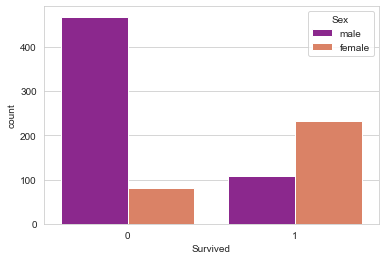

In [378]:
sns.set_style("whitegrid", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.countplot(x='Survived',hue='Sex',data=df,color='red',palette='plasma')

<AxesSubplot:xlabel='Survived', ylabel='count'>

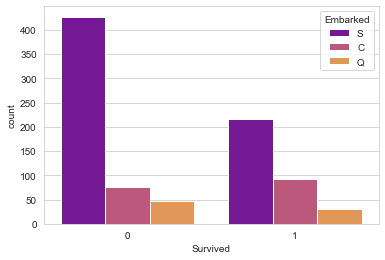

In [379]:
sns.set_style("whitegrid", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.countplot(x='Survived',hue='Embarked',data=df,color='red',palette='plasma')

<AxesSubplot:xlabel='Survived', ylabel='count'>

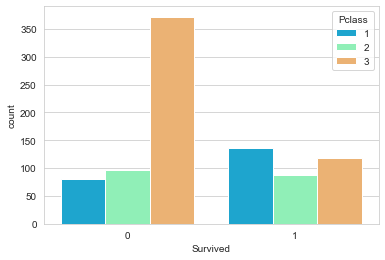

In [380]:
sns.set_style("whitegrid", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.countplot(x='Survived',hue='Pclass',data=df,color='red',palette='rainbow')

<AxesSubplot:xlabel='Survived', ylabel='count'>

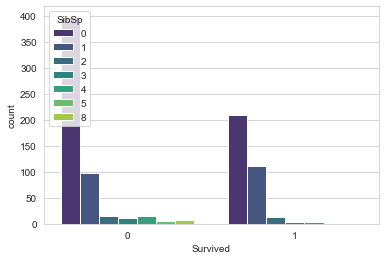

In [381]:
sns.set_style("whitegrid", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.countplot(x='Survived',hue='SibSp',data=df,color='red',palette='viridis')

<AxesSubplot:xlabel='Age'>

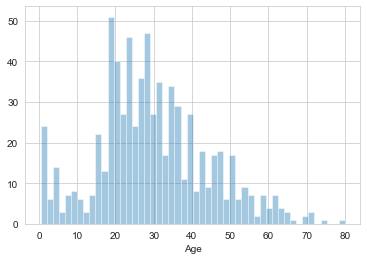

In [382]:
sns.distplot(df['Age'].dropna(),kde=False,bins=50)

In [383]:
df['Age'].median()

28.0

In [384]:
df['Age'].mean()

29.69911764705882

<AxesSubplot:xlabel='Age'>

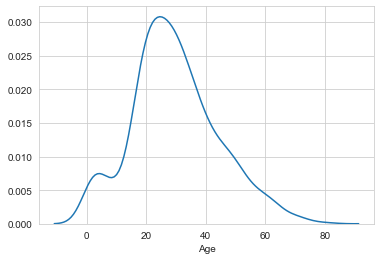

In [385]:
sns.distplot(df['Age'].dropna(),hist=False)

<AxesSubplot:>

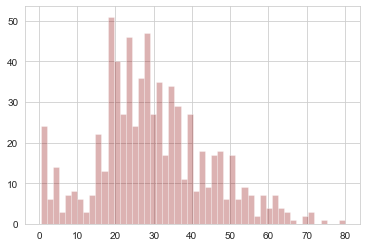

In [386]:
df['Age'].hist(bins=50,color='darkred', alpha=0.3)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

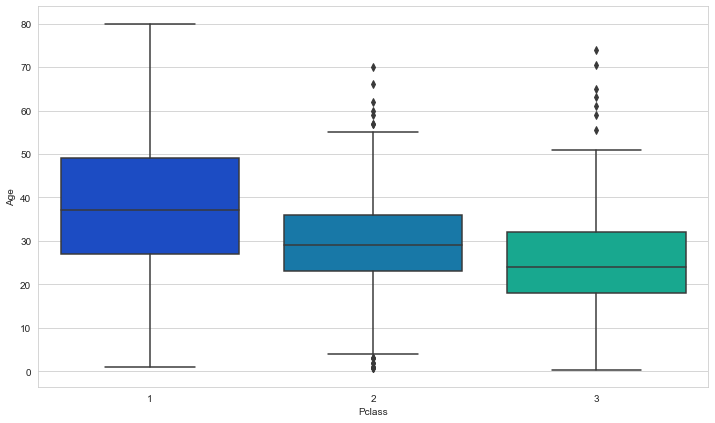

In [387]:
plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass',y='Age',data=df,palette='winter')

In [388]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [389]:
df['Age'] = df[['Age','Pclass']].apply(impute_age, axis=1)

<AxesSubplot:>

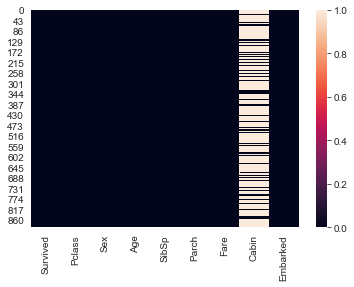

In [390]:
sns.heatmap(df.isnull())

In [391]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [392]:
df['Cabin'].isnull().mean()

0.7710437710437711

In [393]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [394]:
df['Cabin'].dropna().mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [395]:
df.drop('Cabin', axis=1, inplace=True)

In [396]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [397]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [398]:
df.dropna(inplace=True)

In [399]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [400]:
Embarked = df[['Embarked']]
Embarked = pd.get_dummies(Embarked,drop_first=True)
Embarked

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
...,...,...
886,0,1
887,0,1
888,0,1
889,0,0


In [401]:
Sex = df[['Sex']]
Sex = pd.get_dummies(Sex,drop_first=True)
Sex

,Sex_male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [402]:
df = df.drop(['Embarked','Sex'], axis=1)


In [403]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500


In [404]:
df = pd.concat([df,Embarked,Sex], axis=1)
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1


In [405]:
df.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
Sex_male      0
dtype: int64

In [406]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,0,3,22.0,1,0,7.2500,0,1,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,1,0
3,1,1,35.0,1,0,53.1000,0,1,0
4,0,3,35.0,0,0,8.0500,0,1,1


In [407]:
df.shape

(889, 9)

In [425]:
X = df.iloc[:,1:]
X.head()

,Pclass,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Sex_male
0,3,22.0,1,0,7.2500,0,1,1
1,1,38.0,1,0,71.2833,0,0,0
2,3,26.0,0,0,7.9250,0,1,0
3,1,35.0,1,0,53.1000,0,1,0
4,3,35.0,0,0,8.0500,0,1,1


In [426]:
y = df.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

##### Train Test Split

In [427]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=101)

### Model Selection

#### Random forest

In [428]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()

In [429]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in a random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt', 'log2']
# maximum number of Levels in tree
max_depth = [int(x) for x in np.linspace(10,1000,10)]
# minimum number of samples required to split a node
min_samples_split = [2,3,4,5,7,9]
# minimum number of samples required at each leaf node
min_samples_leaf = [2,4,6,8]
# create the random grid
random_grid = {'n_estimators' : n_estimators,
              'max_features' : max_features,
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf,
              'criterion' : ['entropy','gini']}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 3, 4, 5, 7, 9], 'min_samples_leaf': [2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [430]:
randomizedSearchCV = RandomizedSearchCV(classifier,param_distributions=random_grid, n_jobs=-1,cv=5,verbose=2)

In [431]:
randomizedSearchCV.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   31.1s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   41.9s finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [2, 4, 6, 8],
                                        'min_samples_split': [2, 3, 4, 5, 7, 9],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   verbose=2)

In [432]:
y_pred=randomizedSearchCV.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

0.8707865168539326
              precision    recall  f1-score   support

           0       0.86      0.94      0.90       107
           1       0.90      0.76      0.82        71

    accuracy                           0.87       178
   macro avg       0.88      0.85      0.86       178
weighted avg       0.87      0.87      0.87       178

[[101   6]
 [ 17  54]]


### XGBoost

In [433]:
from xgboost import XGBClassifier

In [434]:
classifier_xgboost = XGBClassifier()

In [435]:
classifier_xgboost.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [436]:
y_pred_xgboost=classifier_xgboost.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred_xgboost))
print(classification_report(y_test,y_pred_xgboost))
print(confusion_matrix(y_test,y_pred_xgboost))

0.8370786516853933
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       107
           1       0.82      0.76      0.79        71

    accuracy                           0.84       178
   macro avg       0.83      0.82      0.83       178
weighted avg       0.84      0.84      0.84       178

[[95 12]
 [17 54]]


In [437]:
params={
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth" : [3,4,5,6,8,10,12,15],
    "min_child_weight" : [1,3,5,7],
    "gamma" : [0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree" : [0.3,0.4,0.5,0.7]
}

In [438]:
random_xgb = RandomizedSearchCV(classifier_xgboost,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_xgb.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


In [ ]:
y_pred_xgba=random_xgb.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
print(accuracy_score(y_test,y_pred_xgba))
print(classification_report(y_test,y_pred_xgba))
print(confusion_matrix(y_test,y_pred_xgba))